In [1]:
%matplotlib inline

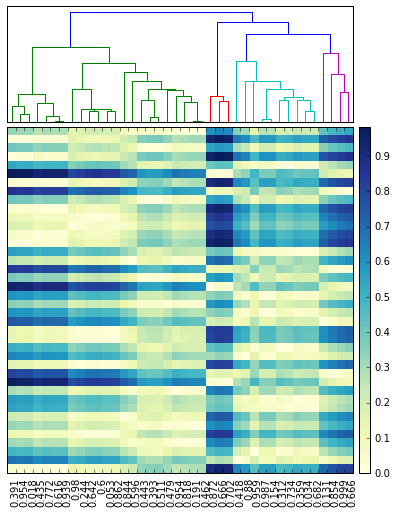

In [27]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import numpy as np
# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
#ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
#Z1 = sch.dendrogram(Y, orientation='right')
#ax1.set_xticks([])
#ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
#axmatrix.set_xticks(x)
axmatrix.set_xticks(np.arange(len(x))+.5)
axmatrix.set_xticklabels([round(g,3) for g in x], rotation='vertical')
axmatrix.tick_params(labeltop='off', labelbottom='on')
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram.png')